In [1]:
# Importing libraries for data manipulation
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import numpy as np

%matplotlib inline

# Importing libraries for data visualization
import matplotlib.pyplot as plt

# Importing an advanced library for data visualization
import seaborn as sns

# Importing library for date manipulation
from datetime import datetime

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript                
IPython.OutputArea.prototype._should_scroll = function(lines) { 
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Reading the data

data = pd.read_excel('Downloads/Stock_X.xlsx')

In [4]:
data.head()

,Date,Open (US$),High(US$),Low(US$),Close(US$),Adj Close(US$),Volume
0,1980-01-02,5.05,5.05,4.94,4.95,1.78,977600
1,1980-01-03,4.94,4.94,4.88,4.90,1.76,1424800
2,1980-01-04,4.91,4.99,4.91,4.99,1.79,713440
3,1980-01-07,4.99,5.00,4.93,4.95,1.78,878280
4,1980-01-08,4.97,5.12,4.97,5.12,1.84,1565720


In [5]:
# Checking Statistical summary of data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open (US$),10307.00,10.59,7.38,2.08,4.38,7.88,16.02,37.05
High(US$),10307.00,10.75,7.47,2.14,4.44,7.98,16.24,37.17
Low(US$),10307.00,10.42,7.28,2.07,4.32,7.72,15.77,36.62
Close(US$),10307.00,10.59,7.37,2.11,4.38,7.86,16.02,37.01
Adj Close(US$),10307.00,8.26,7.07,0.98,2.32,5.74,13.46,32.48
Volume,10307.00,9577701.05,10052328.57,92040.00,2071160.00,6850220.00,14294800.00,200112380.00


**Observation:**
- Close Price(US$) has a mininum value of 2.11 and a maximum of 37 and an average price 10.59 between 1980 to 2020.
- Volume has a mininum value of 92040 and a maximum of 200112400 and an average value of 9577701 per day between 1980 to 2020.
 

In [6]:
# Checking data types for the columns

data.dtypes

Date              datetime64[ns]
Open (US$)               float64
High(US$)                float64
Low(US$)                 float64
Close(US$)               float64
Adj Close(US$)           float64
Volume                     int64
dtype: object

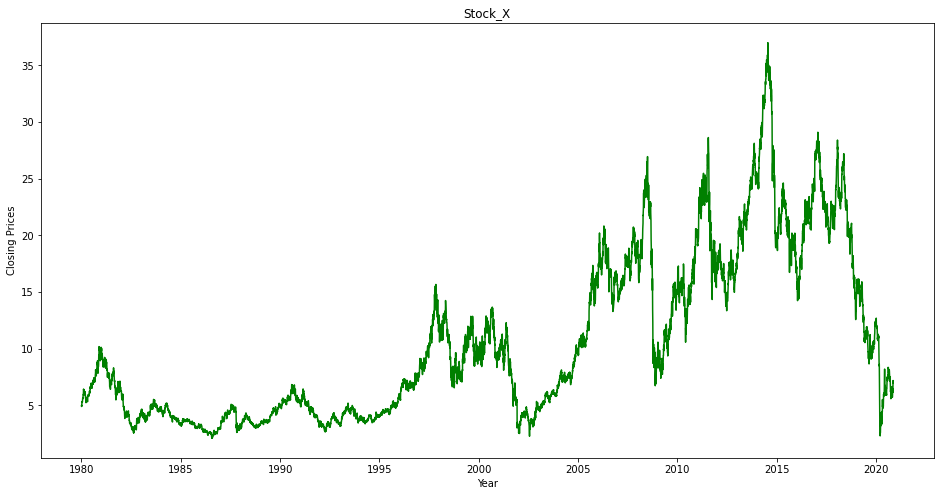

In [7]:
# Visualizing the time series on closing price
plt.figure(figsize=(16, 8))

plt.xlabel("Year")

plt.ylabel("Closing Prices")

plt.title('Stock_X')

plt.plot(data.Date, data['Close(US$)'], color = 'g')

**Observation:**
- From the graph, I can observe the Close price fluctuates heavily, a lot of peaks and troughs between 1980 and 2020. This is quite characteristic of most publicly traded company, I will analyse further. 
- The graph above quite noisy due to the daily price fluctuations, I will average the data over a month to remove some noise, give us a smoother graph and make it easier to identify trends or seasons. 

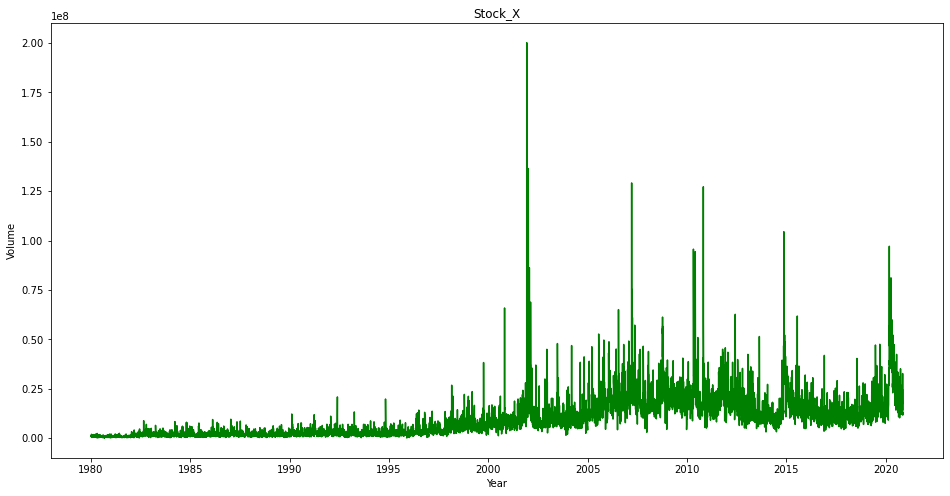

In [8]:
# Visualizing the time series on stock volume
plt.figure(figsize=(16, 8))

plt.xlabel("Year")

plt.ylabel("Volume")

plt.title('Stock_X')

plt.plot(data.Date, data['Volume'], color = 'g')

**Observation:**
- From the graph, I can observe the volume also fluctuates heavily, a lot of spikes between 1980 and 2020. 
- The graph above quite noisy due to the daily price fluctuations, I will average the data over a month to remove some noise, give us a smoother graph and easier to identify trends or seasons

In [9]:
# Converting dataframe to a monthly variation 

# Creating a date column for year and month only
data['YearMonth'] = data['Date'].dt.strftime('%Y - %m')

# Averaging dataframe over monthly intervals for better overview and smoother time series graph
data_monthly = data.groupby('YearMonth').mean().reset_index()

data_monthly.head(5)

,YearMonth,Open (US$),High(US$),Low(US$),Close(US$),Adj Close(US$),Volume
0,1980 - 01,5.33,5.41,5.30,5.37,1.93,931414.55
1,1980 - 02,6.15,6.26,6.07,6.18,2.22,1220778.00
2,1980 - 03,5.73,5.77,5.62,5.69,2.06,1100146.67
3,1980 - 04,5.57,5.63,5.53,5.59,2.02,863645.71
4,1980 - 05,5.93,5.99,5.89,5.94,2.15,791019.05


In [10]:
# Checking column datatype

data_monthly.dtypes

YearMonth          object
Open (US$)        float64
High(US$)         float64
Low(US$)          float64
Close(US$)        float64
Adj Close(US$)    float64
Volume            float64
dtype: object

In [11]:
# Converting Volume to integer type
data_monthly['Volume'] = data_monthly['Volume'].astype(int)

# Converting YearMonth to datetime format
data_monthly['YearMonth'] = pd.to_datetime(data_monthly['YearMonth'], infer_datetime_format = True)

data_monthly.head(5)

,YearMonth,Open (US$),High(US$),Low(US$),Close(US$),Adj Close(US$),Volume
0,1980-01-01,5.33,5.41,5.30,5.37,1.93,931414
1,1980-02-01,6.15,6.26,6.07,6.18,2.22,1220778
2,1980-03-01,5.73,5.77,5.62,5.69,2.06,1100146
3,1980-04-01,5.57,5.63,5.53,5.59,2.02,863645
4,1980-05-01,5.93,5.99,5.89,5.94,2.15,791019


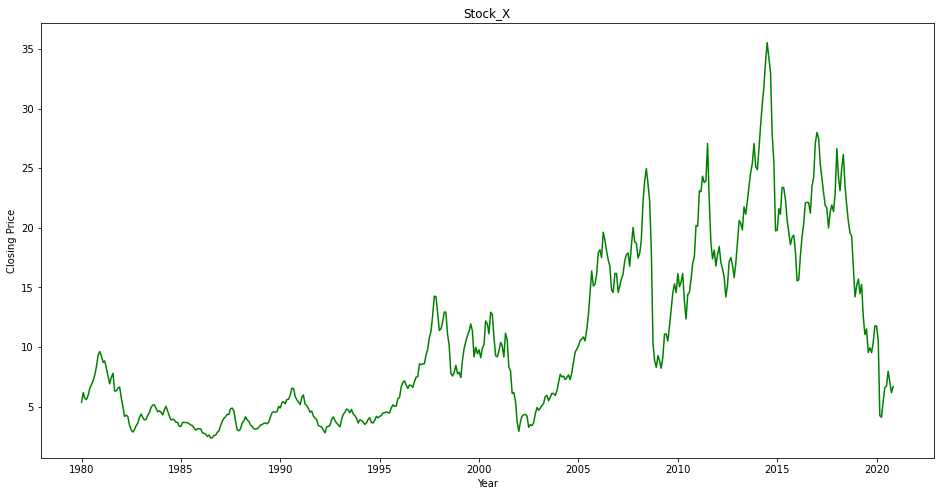

In [12]:
# Visualizing the time series on closing price on monthly variation

plt.figure(figsize=(16, 8))

plt.xlabel("Year")

plt.ylabel("Closing Price")

plt.title('Stock_X')

plt.plot(data_monthly.YearMonth, data_monthly['Close(US$)'], color = 'g')

**Observation:**
- Cleaner graph obtained with monthly variation. Starting Closing Price(US$) rose from 5 to 10, double in a year, it then drops quite significantly to below the starting price in 1983 and rising slightly again before another trough in 1987.
- There seems to be a cycle of peaks and troughs every 5 years but with a generally upward trend from 1980 to 2017 when it starts steep dip until and during the pandemic year 2020.  


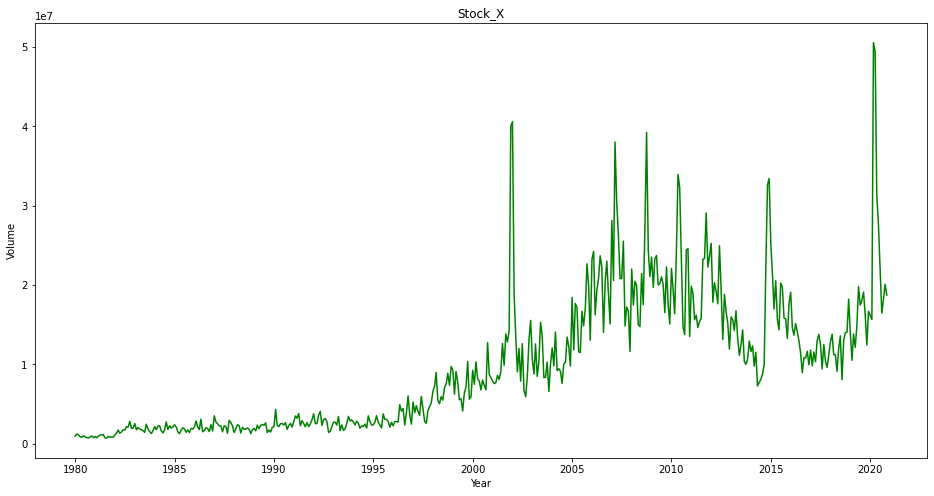

In [13]:
# Visualizing the time series for stock volume on monthly variation

plt.figure(figsize=(16, 8))

plt.xlabel("Year")

plt.ylabel("Volume")

plt.title('Stock_X')

plt.plot(data_monthly.YearMonth, data_monthly['Volume'], color = 'g')

**Observation:**
- The stock volume started at 977600 , fluctuates heavily with peaks in 2002, 2007, 2009, 2011, 2015 and 2020 suggesting a major annoucement or event.
- The stock volume time series generally trended upwards between 1980 and 2020.

In [14]:
# Creating new column to evaluate total value of stock

data_monthly['Total(US$)'] = data_monthly['Close(US$)'] * data_monthly['Volume']

data_monthly.head(5)

,YearMonth,Open (US$),High(US$),Low(US$),Close(US$),Adj Close(US$),Volume,Total(US$)
0,1980-01-01,5.33,5.41,5.30,5.37,1.93,931414,4998372.18
1,1980-02-01,6.15,6.26,6.07,6.18,2.22,1220778,7542646.95
2,1980-03-01,5.73,5.77,5.62,5.69,2.06,1100146,6260277.06
3,1980-04-01,5.57,5.63,5.53,5.59,2.02,863645,4825080.36
4,1980-05-01,5.93,5.99,5.89,5.94,2.15,791019,4698375.23


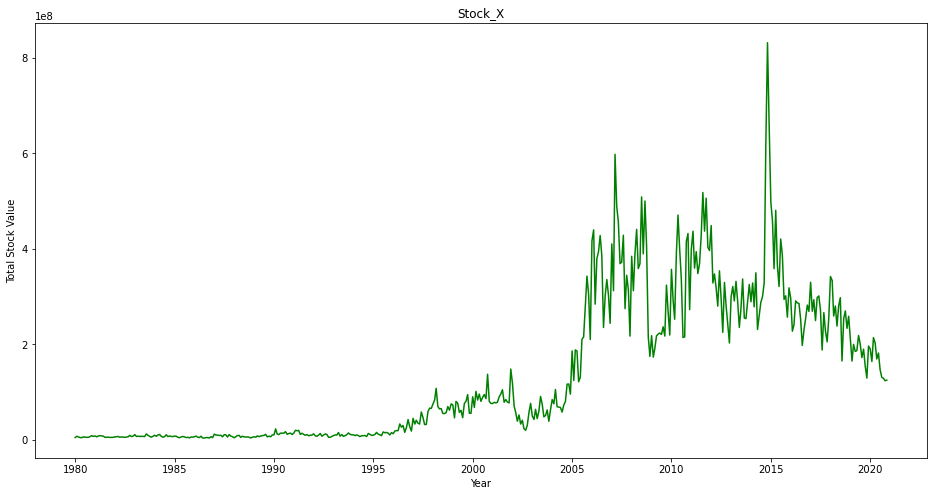

In [15]:
# Visualizing the time series on Total stock value
plt.figure(figsize=(16, 8))

plt.xlabel("Year")

plt.ylabel("Total Stock Value")

plt.title('Stock_X')

plt.plot(data_monthly.YearMonth, data_monthly['Total(US$)'], color = 'g')

**Observation:**
- Graph of the total stock value follows similar pattern with the Stock volume time series above. 

In [16]:
# Creating dataframe for aaverage monthly Closing price time series

Close_Price_monthly = pd.DataFrame()
Close_Price_monthly['YearMonth'] = data_monthly['YearMonth']
Close_Price_monthly['Close(US$)'] = data_monthly['Close(US$)']

Close_Price_monthly = Close_Price_monthly.set_index(['YearMonth'])

Close_Price_monthly.head(5)

,Close(US$)
YearMonth,
1980-01-01,5.37
1980-02-01,6.18
1980-03-01,5.69
1980-04-01,5.59
1980-05-01,5.94


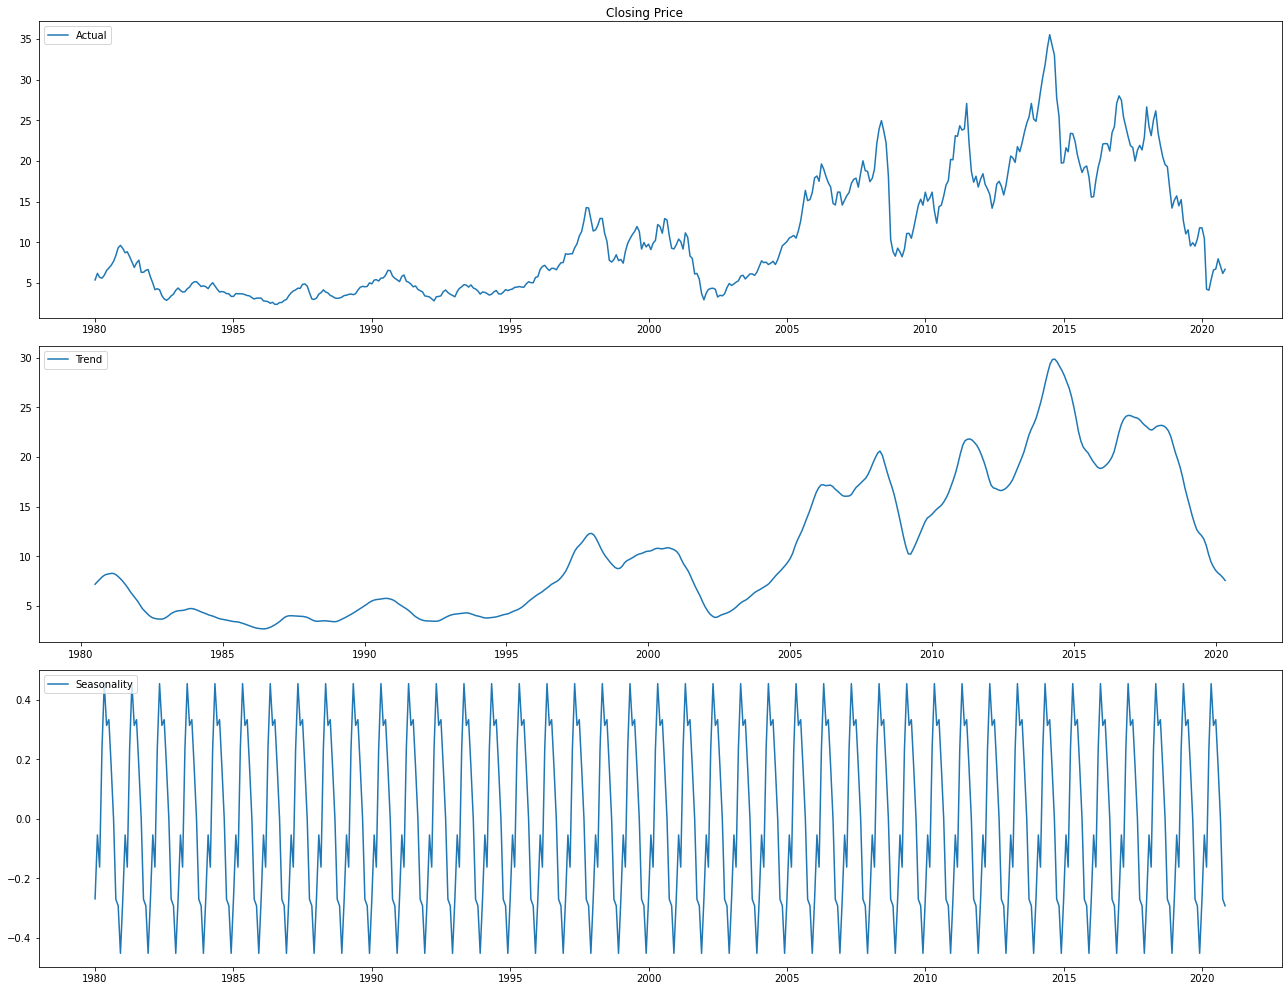

In [17]:
#Decomposing time series components into Trend and Seasonality for closing Price

# Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(Close_Price_monthly)

trend = decomp.trend

seasonal = decomp.seasonal

fig = plt.figure(figsize = (18, 14))
fig.suptitle('Closing Price')

plt.subplot(311)

plt.plot(Close_Price_monthly, label = 'Actual')

plt.legend(loc = 'upper left')

plt.subplot(312)

plt.plot(trend, label = 'Trend')

plt.legend(loc = 'upper left')

plt.subplot(313)

plt.plot(seasonal, label = 'Seasonality')

plt.legend(loc = 'upper left')


plt.tight_layout()



**Observation:**
- We can observe significant trend and seasonality in the time series of the Closing Price.
- Form the analysis of the trend component, something crucial happen between 1995 - 1998, the price rose significantly from USD 5 to 15, then Closing price was sustained at about USD 10 before dipping significantly in 2001.
- The Closing Price also show particular sensitivity to the economic recession in the USA in 2001 and 2008 seen evidently in the significant dips during that period. It was also on a downward trend before and during the pandemic year 2020.
- The seasonality plot of Closing Prices also shows a very consisitent pattern of peaks at the middle of the year and lows at the start or end of the year.

In [18]:
# Creating dataframe for average monthly stock volume time series

Stock_Volume_monthly = pd.DataFrame()
Stock_Volume_monthly['YearMonth'] = data_monthly['YearMonth']
Stock_Volume_monthly['Volume'] = data_monthly['Volume']

Stock_Volume_monthly = Stock_Volume_monthly.set_index(['YearMonth'])

Stock_Volume_monthly.head(5)

,Volume
YearMonth,
1980-01-01,931414
1980-02-01,1220778
1980-03-01,1100146
1980-04-01,863645
1980-05-01,791019


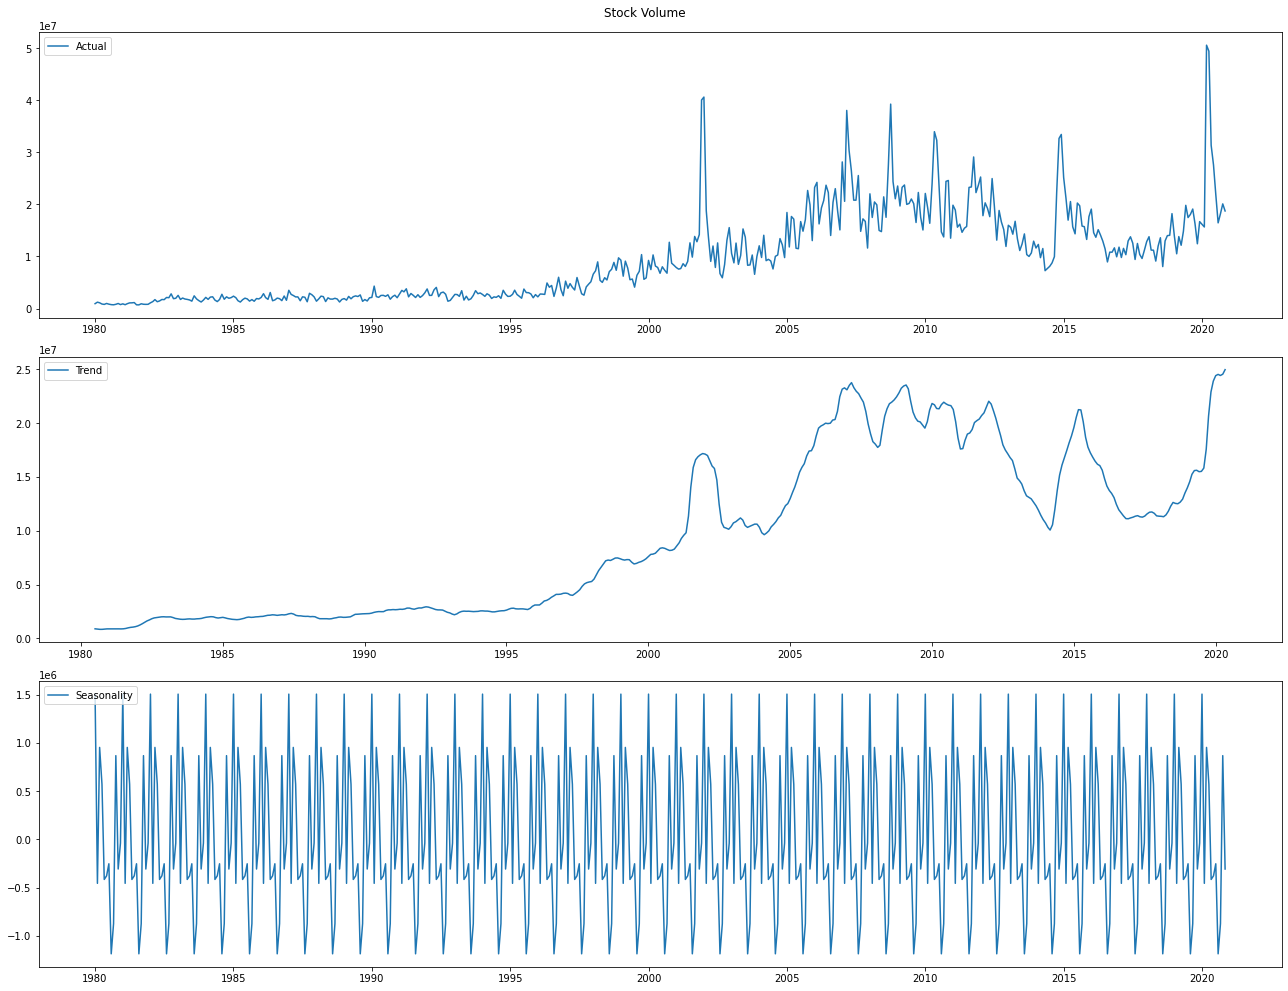

In [19]:
#Decomposing time series components into Trend and Seasonality for Stock Volume

# Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_V = seasonal_decompose(Stock_Volume_monthly)

trend_V = decomp_V.trend

seasonal_V = decomp_V.seasonal

fig = plt.figure(figsize = (18, 14))
fig.suptitle('Stock Volume')

plt.subplot(311)

plt.plot(Stock_Volume_monthly, label = 'Actual')

plt.legend(loc = 'upper left')

plt.subplot(312)

plt.plot(trend_V, label = 'Trend')

plt.legend(loc = 'upper left')

plt.subplot(313)

plt.plot(seasonal_V, label = 'Seasonality')

plt.legend(loc = 'upper left')

plt.tight_layout()



**Observation:**
- From the analysis of trend component, the stock volume see a steady rise with signification fluctuations between 2001 and 2020, but generally trended upwards between 1980 to 2020.
- Some of the peaks in the Stock volume trends coincides with peaks in the Close Price trend analysis.
- The seasonality here shows a pattern somewhat opposite from the closing price, it seems to have its peak at the start of the year and lows at the middle of the year which makes sense as stocks are bought when price is low and sold when price is high.

In [20]:
# Creating a date column for year and month only to analyse yearly boxplot

data_monthly['Year'] = data_monthly['YearMonth'].dt.strftime('%Y')
data_monthly.head(5)

,YearMonth,Open (US$),High(US$),Low(US$),Close(US$),Adj Close(US$),Volume,Total(US$),Year
0,1980-01-01,5.33,5.41,5.30,5.37,1.93,931414,4998372.18,1980
1,1980-02-01,6.15,6.26,6.07,6.18,2.22,1220778,7542646.95,1980
2,1980-03-01,5.73,5.77,5.62,5.69,2.06,1100146,6260277.06,1980
3,1980-04-01,5.57,5.63,5.53,5.59,2.02,863645,4825080.36,1980
4,1980-05-01,5.93,5.99,5.89,5.94,2.15,791019,4698375.23,1980


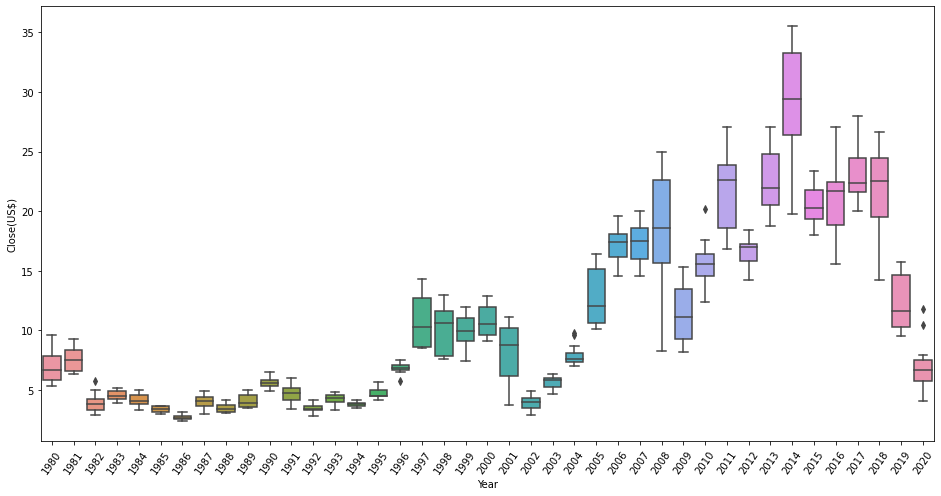

In [21]:
# Boxplot for Closing Price to visualize min, max and average values over the years 

fig = plt.figure(figsize = (16, 8))

sns.boxplot(x = 'Year', y = 'Close(US$)', data = data_monthly);

plt.xticks(rotation = 55);

**Observation:**
- Boxplot of min, max and average values shows a pattern similar to the Closing Price time series analysed above.
- It is also observed the wider variation in Closing Prices for each year as the time series progresses.
- Some outliers are observed in year 1982, 1996 2004, 2010 and 2020

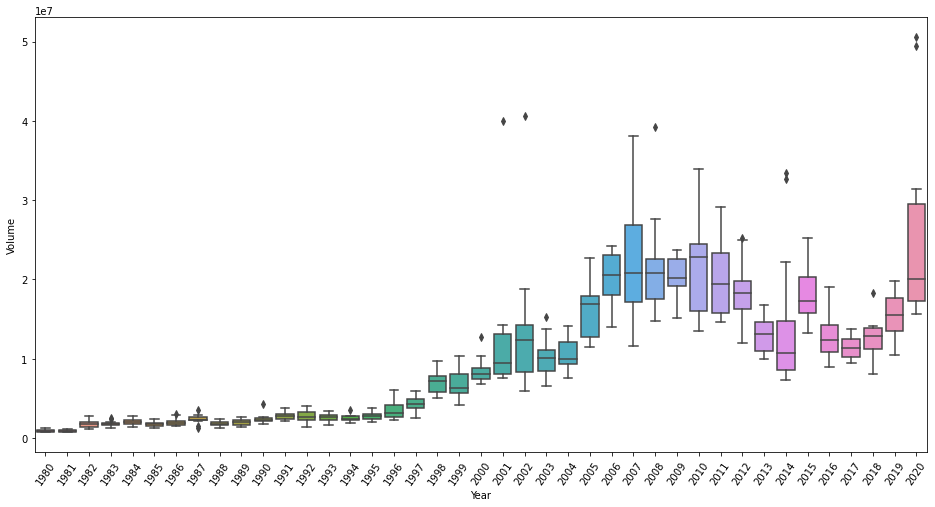

In [22]:
# Boxplot for Stock Volume to analyse min, max and average values over the years

fig = plt.figure(figsize = (16, 8))

sns.boxplot(x = 'Year', y = 'Volume', data = data_monthly);

plt.xticks(rotation = 55);

**Observation:**
- Boxplot of min, max and average values shows a pattern similar to the Stock Volume time series analysed above.
- It is also observed the wider variation in Stock volume during each year as the time series progresses.
- Some outliers are observed in year 1987, 1990 2000, 2002,2008,2014 and 2020

**Conclusion & Observation:**
- Its is assumed this is and American company since all the prices are in US dollars.
- Just like any other regular stock price, prices fluctuate heavily over time
- It is observed that the Stock Price is highly sensitive to economics downturns, as seen in the steep drop in prices in 2001, 2008, before and during pandemic year 2020.
- I believe this is a **financial institution (bank or insurance company)** in the United States due to its high sensitivity to the history of economic downturns in the country. 